# Utkarsh Agarwal

## Research question/interests
My interest in this field  is due to my interest in the field of crypto currency. With not much experience in the field, I intend to learn more through my teammates at the same time learning the necessary data processing skills. I intend to establish a relationship between the pricing trends of two different crypto currencies through the two data sets containing historical data on the same.

In [464]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime

In [465]:
bit= pd.read_csv("/Users/utkarshagarwal/DATA301/project/project-group08-project/data/processed/Bitcoin Historical Data cleaned.csv")
bit
            

,Date,Close,Open,High,Low,Vol.
0,"Jul 26, 2021","38,233.20","35,392.30","39,639.90","35,236.70",161.68K
1,"Jul 25, 2021","35,391.10","34,392.50","35,391.10","33,881.30",65.10K
2,"Jul 24, 2021","33,824.80","33,600.50","33,955.00","33,412.90",67.14K
3,"Jul 23, 2021","33,603.30","32,297.90","33,605.60","32,041.10",66.15K
4,"Jul 22, 2021","32,298.90","32,131.70","32,585.40","31,729.40",64.87K
...,...,...,...,...,...,...
2176,"Aug 11, 2015",269,263.3,269.9,261.4,51.36K
2177,"Aug 10, 2015",263.3,263.9,266.6,260.5,48.57K
2178,"Aug 09, 2015",263.9,258.6,266.8,258.6,57.48K
2179,"Aug 08, 2015",258.6,277.9,278.9,257.4,82.54K


In [466]:
eth= pd.read_csv("/Users/utkarshagarwal/DATA301/project/project-group08-project/data/processed/ethereum cleaned.csv")
eth

,Date,Close,Open,High,Low,Volume
0,26/07/21,2233.366699,2191.309814,2428.817139,2177.329590,2.961432e+10
1,25/07/21,2191.373779,2187.145508,2194.438232,2108.829834,1.456648e+10
2,24/07/21,2189.218750,2123.961182,2197.649414,2107.323486,1.605745e+10
3,23/07/21,2124.776611,2025.105713,2129.441162,2000.436279,1.620039e+10
4,22/07/21,2025.202759,1994.822876,2044.116455,1954.297852,1.749548e+10
...,...,...,...,...,...,...
2207,NaN,NaN,NaN,NaN,NaN,NaN
2208,NaN,NaN,NaN,NaN,NaN,NaN
2209,NaN,NaN,NaN,NaN,NaN,NaN
2210,NaN,NaN,NaN,NaN,NaN,NaN


## Basic Data Info:

In [467]:
bit.shape

(2181, 6)

In [468]:
eth.shape

(2212, 6)

In [469]:
bit.columns

Index(['Date', 'Close', 'Open', 'High', 'Low', 'Vol.'], dtype='object')

In [470]:
eth.columns

Index(['Date', 'Close', 'Open', 'High', 'Low', 'Volume'], dtype='object')

In [471]:
bit.nunique(axis=0)

Date     2181
Close    2137
Open     2131
High     2133
Low      2134
Vol.     2071
dtype: int64

In [472]:
eth.nunique(axis=0)

Date      2181
Close     2175
Open      2176
High      2177
Low       2176
Volume    2177
dtype: int64

In [473]:
eth.describe()

,Close,Open,High,Low,Volume
count,2177.000000,2177.000000,2177.000000,2177.000000,2.177000e+03
mean,399.017519,398.060882,413.900953,380.314871,7.128040e+09
std,619.338916,618.203916,646.757010,585.147027,1.065664e+10
min,0.434829,0.431589,0.482988,0.420897,1.021280e+05
25%,13.883900,13.864300,14.373900,13.254300,3.911200e+07
50%,200.634995,200.608871,206.361450,194.783997,2.201160e+09
75%,392.189972,391.488617,405.616364,381.273834,9.818257e+09
max,4168.701172,4174.635742,4362.350586,3785.848633,8.448291e+10


In [474]:
bit.describe()

,Date,Close,Open,High,Low,Vol.
count,2181,2181,2181,2181,2181,2181
unique,2181,2137,2131,2133,2134,2071
top,"Jul 26, 2021",229.5,229.5,630.8,592.8,1.05M
freq,1,3,3,2,3,6


## Cleaning

In [475]:

eth=(
      eth.dropna(axis=0)
      .reindex(columns=[ 'Date', 'Open', 'Close', 'High', 'Low', 'Volume'])
      .iloc[::-1]
      .reset_index(drop=True)
)
eth['Date'] = pd.to_datetime(eth['Date'], format='%d/%m/%y')
eth




,Date,Open,Close,High,Low,Volume
0,2015-08-07,2.831620,2.772120,3.536610,2.521120,1.643290e+05
1,2015-08-08,2.793760,0.753325,2.798810,0.714725,6.741880e+05
2,2015-08-09,0.706136,0.701897,0.879810,0.629191,5.321700e+05
3,2015-08-10,0.713989,0.708448,0.729854,0.636546,4.052830e+05
4,2015-08-11,0.708087,1.067860,1.131410,0.663235,1.463100e+06
...,...,...,...,...,...,...
2172,2021-07-22,1994.822876,2025.202759,2044.116455,1954.297852,1.749548e+10
2173,2021-07-23,2025.105713,2124.776611,2129.441162,2000.436279,1.620039e+10
2174,2021-07-24,2123.961182,2189.218750,2197.649414,2107.323486,1.605745e+10
2175,2021-07-25,2187.145508,2191.373779,2194.438232,2108.829834,1.456648e+10


In [476]:

bit=(
    bit.rename(columns={'Vol.': 'Volume'}) 
     .reindex(columns=[ 'Date', 'Open', 'Close', 'High', 'Low', 'Volume'])
     .iloc[::-1]
     .reset_index(drop=True)
)
bit

,Date,Open,Close,High,Low,Volume
0,"Aug 07, 2015",278,277.9,279.6,274.3,42.81K
1,"Aug 08, 2015",277.9,258.6,278.9,257.4,82.54K
2,"Aug 09, 2015",258.6,263.9,266.8,258.6,57.48K
3,"Aug 10, 2015",263.9,263.3,266.6,260.5,48.57K
4,"Aug 11, 2015",263.3,269,269.9,261.4,51.36K
...,...,...,...,...,...,...
2176,"Jul 22, 2021","32,131.70","32,298.90","32,585.40","31,729.40",64.87K
2177,"Jul 23, 2021","32,297.90","33,603.30","33,605.60","32,041.10",66.15K
2178,"Jul 24, 2021","33,600.50","33,824.80","33,955.00","33,412.90",67.14K
2179,"Jul 25, 2021","34,392.50","35,391.10","35,391.10","33,881.30",65.10K


In [477]:
bit['Open'] =( 
    bit['Open'].str.replace(',', '')
      .astype(float))

In [478]:
bit['Close'] = (
    bit['Close'].str.replace(',', '')
      .astype(float))

In [479]:
bit['High'] = (
    bit['High'].str.replace(',', '')
      .astype(float))

In [480]:
bit['Low'] =(
    bit['Low'].str.replace(',', '')
      .astype(float))
bit

,Date,Open,Close,High,Low,Volume
0,"Aug 07, 2015",278.0,277.9,279.6,274.3,42.81K
1,"Aug 08, 2015",277.9,258.6,278.9,257.4,82.54K
2,"Aug 09, 2015",258.6,263.9,266.8,258.6,57.48K
3,"Aug 10, 2015",263.9,263.3,266.6,260.5,48.57K
4,"Aug 11, 2015",263.3,269.0,269.9,261.4,51.36K
...,...,...,...,...,...,...
2176,"Jul 22, 2021",32131.7,32298.9,32585.4,31729.4,64.87K
2177,"Jul 23, 2021",32297.9,33603.3,33605.6,32041.1,66.15K
2178,"Jul 24, 2021",33600.5,33824.8,33955.0,33412.9,67.14K
2179,"Jul 25, 2021",34392.5,35391.1,35391.1,33881.3,65.10K


In [481]:
bit['Volume']=(
    bit['Volume'].str.replace('.','')
        .str.replace('K','000')
        .str.replace('M','000000')
        .astype(float))

bit

<ipython-input-481-aebbac5086ff>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bit['Volume'].str.replace('.','')


,Date,Open,Close,High,Low,Volume
0,"Aug 07, 2015",278.0,277.9,279.6,274.3,4281000.0
1,"Aug 08, 2015",277.9,258.6,278.9,257.4,8254000.0
2,"Aug 09, 2015",258.6,263.9,266.8,258.6,5748000.0
3,"Aug 10, 2015",263.9,263.3,266.6,260.5,4857000.0
4,"Aug 11, 2015",263.3,269.0,269.9,261.4,5136000.0
...,...,...,...,...,...,...
2176,"Jul 22, 2021",32131.7,32298.9,32585.4,31729.4,6487000.0
2177,"Jul 23, 2021",32297.9,33603.3,33605.6,32041.1,6615000.0
2178,"Jul 24, 2021",33600.5,33824.8,33955.0,33412.9,6714000.0
2179,"Jul 25, 2021",34392.5,35391.1,35391.1,33881.3,6510000.0


In [482]:
bit.dtypes



Date       object
Open      float64
Close     float64
High      float64
Low       float64
Volume    float64
dtype: object

In [486]:
bit['Date']=(
bit['Date'].str.replace('Jan','01')
   .str.replace('Feb','02')
   .str.replace('Mar','03')
   .str.replace('Apr','04')
   .str.replace('May','05')
   .str.replace('Jun','06')
   .str.replace('Jul','07')
   .str.replace('Aug','08')
   .str.replace('Sep','09')
   .str.replace('Oct','10')
   .str.replace('Nov','11')
   .str.replace('Dec','12')
   .str.replace(',','')
   .str.replace(' ',''))

bit


,Date,Open,Close,High,Low,Volume
0,08072015,278.0,277.9,279.6,274.3,4281000.0
1,08082015,277.9,258.6,278.9,257.4,8254000.0
2,08092015,258.6,263.9,266.8,258.6,5748000.0
3,08102015,263.9,263.3,266.6,260.5,4857000.0
4,08112015,263.3,269.0,269.9,261.4,5136000.0
...,...,...,...,...,...,...
2176,07222021,32131.7,32298.9,32585.4,31729.4,6487000.0
2177,07232021,32297.9,33603.3,33605.6,32041.1,6615000.0
2178,07242021,33600.5,33824.8,33955.0,33412.9,6714000.0
2179,07252021,34392.5,35391.1,35391.1,33881.3,6510000.0


In [487]:
bit['Date'] = pd.to_datetime(bit['Date'], format='%m%d%Y')
bit


,Date,Open,Close,High,Low,Volume
0,2015-08-07,278.0,277.9,279.6,274.3,4281000.0
1,2015-08-08,277.9,258.6,278.9,257.4,8254000.0
2,2015-08-09,258.6,263.9,266.8,258.6,5748000.0
3,2015-08-10,263.9,263.3,266.6,260.5,4857000.0
4,2015-08-11,263.3,269.0,269.9,261.4,5136000.0
...,...,...,...,...,...,...
2176,2021-07-22,32131.7,32298.9,32585.4,31729.4,6487000.0
2177,2021-07-23,32297.9,33603.3,33605.6,32041.1,6615000.0
2178,2021-07-24,33600.5,33824.8,33955.0,33412.9,6714000.0
2179,2021-07-25,34392.5,35391.1,35391.1,33881.3,6510000.0


## merging datasets for visualisations

In [488]:
bit

,Date,Open,Close,High,Low,Volume
0,2015-08-07,278.0,277.9,279.6,274.3,4281000.0
1,2015-08-08,277.9,258.6,278.9,257.4,8254000.0
2,2015-08-09,258.6,263.9,266.8,258.6,5748000.0
3,2015-08-10,263.9,263.3,266.6,260.5,4857000.0
4,2015-08-11,263.3,269.0,269.9,261.4,5136000.0
...,...,...,...,...,...,...
2176,2021-07-22,32131.7,32298.9,32585.4,31729.4,6487000.0
2177,2021-07-23,32297.9,33603.3,33605.6,32041.1,6615000.0
2178,2021-07-24,33600.5,33824.8,33955.0,33412.9,6714000.0
2179,2021-07-25,34392.5,35391.1,35391.1,33881.3,6510000.0


In [489]:
eth

,Date,Open,Close,High,Low,Volume
0,2015-08-07,2.831620,2.772120,3.536610,2.521120,1.643290e+05
1,2015-08-08,2.793760,0.753325,2.798810,0.714725,6.741880e+05
2,2015-08-09,0.706136,0.701897,0.879810,0.629191,5.321700e+05
3,2015-08-10,0.713989,0.708448,0.729854,0.636546,4.052830e+05
4,2015-08-11,0.708087,1.067860,1.131410,0.663235,1.463100e+06
...,...,...,...,...,...,...
2172,2021-07-22,1994.822876,2025.202759,2044.116455,1954.297852,1.749548e+10
2173,2021-07-23,2025.105713,2124.776611,2129.441162,2000.436279,1.620039e+10
2174,2021-07-24,2123.961182,2189.218750,2197.649414,2107.323486,1.605745e+10
2175,2021-07-25,2187.145508,2191.373779,2194.438232,2108.829834,1.456648e+10


In [490]:
merge1=pd.merge(bit,eth,on="Date",how="inner")

In [491]:
merge1

,Date,Open_x,Close_x,High_x,Low_x,Volume_x,Open_y,Close_y,High_y,Low_y,Volume_y
0,2015-08-07,278.0,277.9,279.6,274.3,4281000.0,2.831620,2.772120,3.536610,2.521120,1.643290e+05
1,2015-08-08,277.9,258.6,278.9,257.4,8254000.0,2.793760,0.753325,2.798810,0.714725,6.741880e+05
2,2015-08-09,258.6,263.9,266.8,258.6,5748000.0,0.706136,0.701897,0.879810,0.629191,5.321700e+05
3,2015-08-10,263.9,263.3,266.6,260.5,4857000.0,0.713989,0.708448,0.729854,0.636546,4.052830e+05
4,2015-08-11,263.3,269.0,269.9,261.4,5136000.0,0.708087,1.067860,1.131410,0.663235,1.463100e+06
...,...,...,...,...,...,...,...,...,...,...,...
2172,2021-07-22,32131.7,32298.9,32585.4,31729.4,6487000.0,1994.822876,2025.202759,2044.116455,1954.297852,1.749548e+10
2173,2021-07-23,32297.9,33603.3,33605.6,32041.1,6615000.0,2025.105713,2124.776611,2129.441162,2000.436279,1.620039e+10
2174,2021-07-24,33600.5,33824.8,33955.0,33412.9,6714000.0,2123.961182,2189.218750,2197.649414,2107.323486,1.605745e+10
2175,2021-07-25,34392.5,35391.1,35391.1,33881.3,6510000.0,2187.145508,2191.373779,2194.438232,2108.829834,1.456648e+10


In [492]:
merge1.columns= [x.replace('_x','_bit') for x in merge1.columns]
merge1.columns= [x.replace('_y','_eth') for x in merge1.columns]


In [493]:
merge1

,Date,Open_bit,Close_bit,High_bit,Low_bit,Volume_bit,Open_eth,Close_eth,High_eth,Low_eth,Volume_eth
0,2015-08-07,278.0,277.9,279.6,274.3,4281000.0,2.831620,2.772120,3.536610,2.521120,1.643290e+05
1,2015-08-08,277.9,258.6,278.9,257.4,8254000.0,2.793760,0.753325,2.798810,0.714725,6.741880e+05
2,2015-08-09,258.6,263.9,266.8,258.6,5748000.0,0.706136,0.701897,0.879810,0.629191,5.321700e+05
3,2015-08-10,263.9,263.3,266.6,260.5,4857000.0,0.713989,0.708448,0.729854,0.636546,4.052830e+05
4,2015-08-11,263.3,269.0,269.9,261.4,5136000.0,0.708087,1.067860,1.131410,0.663235,1.463100e+06
...,...,...,...,...,...,...,...,...,...,...,...
2172,2021-07-22,32131.7,32298.9,32585.4,31729.4,6487000.0,1994.822876,2025.202759,2044.116455,1954.297852,1.749548e+10
2173,2021-07-23,32297.9,33603.3,33605.6,32041.1,6615000.0,2025.105713,2124.776611,2129.441162,2000.436279,1.620039e+10
2174,2021-07-24,33600.5,33824.8,33955.0,33412.9,6714000.0,2123.961182,2189.218750,2197.649414,2107.323486,1.605745e+10
2175,2021-07-25,34392.5,35391.1,35391.1,33881.3,6510000.0,2187.145508,2191.373779,2194.438232,2108.829834,1.456648e+10


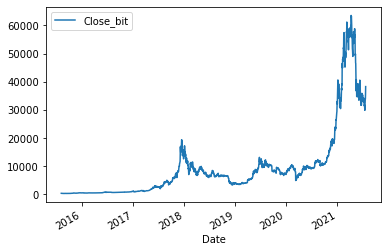

In [332]:
y=merge1.plot( 'Date' , 'Close_bit' )


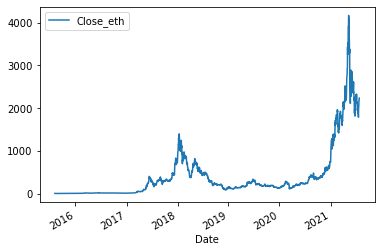

In [333]:
y=merge1.plot( 'Date' , 'Close_eth' )


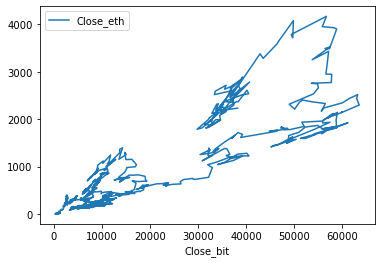

In [334]:
y=merge1.plot( 'Close_bit' , 'Close_eth' )


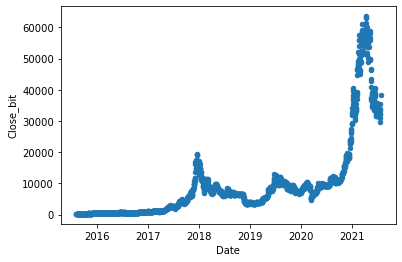

In [335]:
y=merge1.plot( kind= 'scatter', x= 'Date' , y= 'Close_bit' )


In [ ]:
def load_and_process_file1(data_path): 
    #method chain 1
    eth=(
    pd.read_csv(data_path)
      .dropna(axis=0)
      .reindex(columns=[ 'Date', 'Open', 'Close', 'High', 'Low', 'Volume'])
      .iloc[::-1]
      .reset_index(drop=True)
)
eth['Date'] = pd.to_datetime(eth['Date'], format='%d/%m/%y')
 return eth
    

In [ ]:
def load_and_process_file2(data_path):
    #Method chain1
    bit=(
    pd.read_csv(data_path)
     .rename(columns={'Vol.': 'Volume'}) 
     .reindex(columns=[ 'Date', 'Open', 'Close', 'High', 'Low', 'Volume'])
     .iloc[::-1]
     .reset_index(drop=True))
    #method chain 2
    bit['Open'] =( 
    bit['Open'].str.replace(',', '')
      .astype(float))
    #method chain 3
    bit['Close'] = (
    bit['Close'].str.replace(',', '')
      .astype(float))
    #method chain4
    bit['High'] = (
    bit['High'].str.replace(',', '')
      .astype(float))
    #method chain5
    bit['Low'] =(
    bit['Low'].str.replace(',', '')
      .astype(float))
    #method chain 6
    bit['Volume']=(
    bit['Volume'].str.replace('.','')
        .str.replace('K','000')
        .str.replace('M','000000')
        .astype(float))
    #method chain 7
    bit['Date']=(
bit['Date'].str.replace('Jan','01')
   .str.replace('Feb','02')
   .str.replace('Mar','03')
   .str.replace('Apr','04')
   .str.replace('May','05')
   .str.replace('Jun','06')
   .str.replace('Jul','07')
   .str.replace('Aug','08')
   .str.replace('Sep','09')
   .str.replace('Oct','10')
   .str.replace('Nov','11')
   .str.replace('Dec','12')
   .str.replace(',','')
   .str.replace(' ',''))
bit['Date'] = pd.to_datetime(bit['Date'], format='%m%d%Y')

 return bit


In [ ]:
def merge_and_process_dataframes(file1, file2):
    merge1=pd.merge(file1,file2,on="Date",how="inner")
    merge1.columns= [x.replace('_x','_bit') for x in merge1.columns]
    merge1.columns= [x.replace('_y','_eth') for x in merge1.columns]
    
    return merge1